# Boston_Housing - Regression Analysis

## Import TensorFlow

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.5.0'

* GPU 설정 Off

In [3]:
tf.test.gpu_device_name()

''

# I. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_Set

In [4]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (X_test, y_test) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


> ## 2) Data_Set Information

In [5]:
print(train_data.shape)
print(X_test.shape)

print(train_targets[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# II. Data Preprocessing

> ## 1) Standardization

 * train_data & test_data

In [6]:
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data = train_data - mean
train_data = train_data / std

X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets, 
                                                      test_size = 0.2, 
                                                      random_state = 2045) 

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# III. Boston_Housing Keras Modeling

> ## 1) Model Define

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [9]:
boston.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [10]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 3) Model Fit

 * 약 4분

In [11]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 206.3569 - mae: 10.5232 - val_loss: 55.0467 - val_mae: 4.6740
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 31.7885 - mae: 4.0144 - val_loss: 29.7434 - val_mae: 3.2614
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 21.0897 - mae: 3.2275 - val_loss: 23.4591 - val_mae: 2.9676
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 17.4675 - mae: 2.9070 - val_loss: 23.9720 - val_mae: 2.6921
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 14.9011 - mae: 2.5350 - val_loss: 18.9767 - val_mae: 2.6660
Epoch 6/500
323/323 [==============================] - 0s 1ms/step - loss: 14.0015 - mae: 2.4218 - val_loss: 20.7499 - val_mae: 2.6891
Epoch 7/500
323/323 [==============================] - 0s 1ms/step - loss: 12.6803 - mae: 2.3742 - val_loss: 20.7302 - val_mae: 2.8262
Epoch 8/500
323/323 [==============================] 

> ## 4) Model Evaluate

In [12]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 13.1888 - mae: 2.6355
MAE is : 2.6355042457580566


> ## 5) Visualization

* 전체 시각화

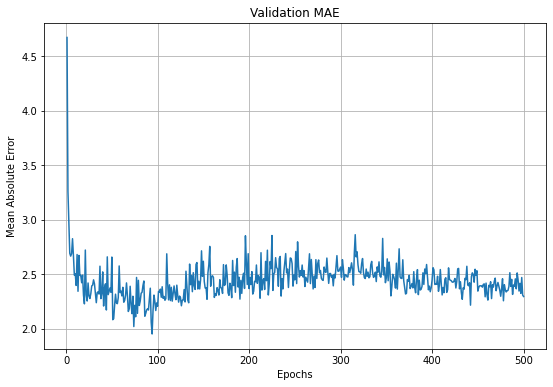

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

* 5번째 이후 MAE 확인

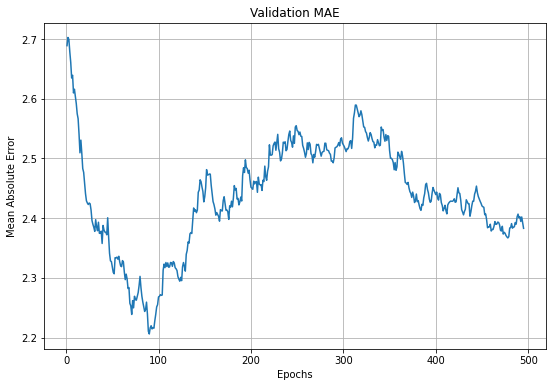

In [14]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

> ## 6) Keras Session Clear

In [15]:
from tensorflow.keras import backend as K

K.clear_session()

# IV. Early Stopping

> ## 1) Model Define & Compile

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 2) EarlyStopping( )

* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae', 
                   mode = 'min', 
                   patience = 50, 
                   verbose = 1)

> ## 3) ModelCheckpoint( )

* 'best_boston.h5' : 최적모델이 저장될 경로
* save_best_only : 최적모델만 저장할지 지정

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5', 
                     monitor = 'val_mae', 
                     mode = 'min', 
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit with callbacks

* callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정

In [19]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 174.6352 - mae: 9.5986 - val_loss: 41.4591 - val_mae: 3.9775

Epoch 00001: val_mae improved from inf to 3.97753, saving model to best_boston.h5
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 26.0134 - mae: 3.5166 - val_loss: 34.0707 - val_mae: 3.4632

Epoch 00002: val_mae improved from 3.97753 to 3.46316, saving model to best_boston.h5
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 20.9524 - mae: 3.1276 - val_loss: 24.6288 - val_mae: 2.9403

Epoch 00003: val_mae improved from 3.46316 to 2.94029, saving model to best_boston.h5
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 16.0361 - mae: 2.8049 - val_loss: 20.7016 - val_mae: 2.5512

Epoch 00004: val_mae improved from 2.94029 to 2.55120, saving model to best_boston.h5
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 14.6006 - mae: 2.5936 - val_loss: 18.938

> ## 5) Best Model

In [20]:
!ls -l

total 76
-rw-r--r-- 1 root root 70280 Jul 20 07:49 best_boston.h5
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


> ## 6) Model Evaluate

In [21]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 15.3469 - mae: 2.4857
MAE is : 2.4856765270233154


# 
# 
# 
# The End
# 
# 
# 